In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from math import *
from scipy.stats import entropy as en
d1 =open("accepted.txt")
d2 = open("allowed copy.txt")
accepted_words = []
accepted_words = d1.read().split(' ')
allowed_words = []
allowed_words = d2.read().split(' ')
no_of_aw = len(allowed_words)
y = np.random.rand(1)
y = np.round(y*len(accepted_words))
target= accepted_words[y[0].astype(int)]

In [4]:
#Test with small package
l = 'abcde'
allowed_words = []
for a in l:
    for b in l:
        for c in l:
            for d in l:
                for e in l:
                    temp = a+b+c+d+e
                    allowed_words.append(temp)

print(allowed_words)

['aaaaa', 'aaaab', 'aaaac', 'aaaad', 'aaaae', 'aaaba', 'aaabb', 'aaabc', 'aaabd', 'aaabe', 'aaaca', 'aaacb', 'aaacc', 'aaacd', 'aaace', 'aaada', 'aaadb', 'aaadc', 'aaadd', 'aaade', 'aaaea', 'aaaeb', 'aaaec', 'aaaed', 'aaaee', 'aabaa', 'aabab', 'aabac', 'aabad', 'aabae', 'aabba', 'aabbb', 'aabbc', 'aabbd', 'aabbe', 'aabca', 'aabcb', 'aabcc', 'aabcd', 'aabce', 'aabda', 'aabdb', 'aabdc', 'aabdd', 'aabde', 'aabea', 'aabeb', 'aabec', 'aabed', 'aabee', 'aacaa', 'aacab', 'aacac', 'aacad', 'aacae', 'aacba', 'aacbb', 'aacbc', 'aacbd', 'aacbe', 'aacca', 'aaccb', 'aaccc', 'aaccd', 'aacce', 'aacda', 'aacdb', 'aacdc', 'aacdd', 'aacde', 'aacea', 'aaceb', 'aacec', 'aaced', 'aacee', 'aadaa', 'aadab', 'aadac', 'aadad', 'aadae', 'aadba', 'aadbb', 'aadbc', 'aadbd', 'aadbe', 'aadca', 'aadcb', 'aadcc', 'aadcd', 'aadce', 'aadda', 'aaddb', 'aaddc', 'aaddd', 'aadde', 'aadea', 'aadeb', 'aadec', 'aaded', 'aadee', 'aaeaa', 'aaeab', 'aaeac', 'aaead', 'aaeae', 'aaeba', 'aaebb', 'aaebc', 'aaebd', 'aaebe', 'aaeca', 

In [5]:
from itertools import *
def create_pattern_list():
    patterns = []
    values = ['0','1','2']
    for a in values:
        for b in values:
            for c in values:
                for d in values:
                    for e in values:
                        temp = [a,b,c,d,e]
                        patterns.append(temp)
    return patterns

In [2]:
def cpl(x):
    temp_i = x
    patterns = []
    for y in allowed_words:
        #print(y)
        temp = y
        l_c = 0
        t = ['0']*5
        for j in x:
            if(j in temp):
                if(temp_i.index(j)==temp.index(j)):
                    #print(temp_i.index(j),temp.index(j))
                    t[temp.index(j)] = '2'
                elif(temp[l_c] == j):
                    t[l_c] = '2'
                else:
                    t[l_c] = '1'
                temp=temp.replace(j,'#',1)
                #temp_i = temp_i.replace(j,'#',1)

                #print(temp)
            l_c+=1
        q = ''
        for s in t:
            q += s
        if(q not in patterns):
            patterns.append(q)
    return patterns
        
        
    

In [3]:
def replace_str_index(text,index=0,replacement=''):
    return '%s%s%s'%(text[:index],replacement,text[index+1:])

In [10]:
def eliminate_1(x,y,sample):
    w = x
    not_exist = []
    exist = ['']*5
    cor = ['']*5
    not_elm = []
    for a in x:
        if(y[x.index(a)] == '0'):
            not_exist.append(a)
            x=x.replace(a,'#',1)
            #print(x)
        elif(y[x.index(a)] == '1'):
            exist[x.index(a)] = a
            x=x.replace(a,'#',1)
            #print(x)
        else:
            cor[x.index(a)] = a
            x=x.replace(a,'#',1)
            #print(x)
    #print(not_exist,exist,cor)
    
    l_ne = []
    l_e = []
    l_c = []
    for word in sample:
        #word = 'super'
        #print(word, end=' ')
        c=0
        fl=[0]*5
        flag = 0
        for m in cor:
            if(m != ''):
                if(m in word and word[c] == m):
                    fl[c] = 1
            c+=1
        #print(fl,end=' ')
        c = 0
        for m in cor:
            if(m != ''):
                if(fl[c] == 1):
                    flag = 1
                else:
                    flag = 0
                    break
            c+=1
        if(flag == 1):
            l_c.append(word)
    if(l_c == []):
        l_c = sample
    #print('super' in l_c)
    #print(l_c)
    
    for word in l_c:
        temp = word
        c = 0
        for t in cor:
            if(t != ''):
                temp = replace_str_index(temp,c,'#')
            c+=1
        
        #print(temp, end=' ')
        c = 0
        fl = [0]*5
        flag = 0
        for m in exist:
            if(m !=''):
                #print(m)
                #m in temp
                if(m in temp and temp[c] != m):
                    fl[c] = 1
                    temp = temp.replace(m,'#',1)
                    #print(temp)
            c+=1
        #print(fl,end=' ')
        c = 0
        for m in exist:
            if(m != ''):
                if(fl[c] == 1):
                    #print('here')
                    flag = 1
                else:
                    flag = 0
                    break
            c+=1
        if(flag == 1):
            l_e.append(word)
            
    #removed y!='111111'
    if(l_e == []):
        l_e = l_c
    #print('super' in l_e)
        #l_e = []
    #print(l_e)
    temp = l_e
    #print(temp)
    for word in temp:
        #print(word)
        for m in not_exist:
            #print(m)
            count = 0
            count = exist.count(m) + cor.count(m)
            #print(count)
            if(m in word):
                if(count==0):
                    l_ne.append(word)
                    #print("removed cause no existence")
                    break
                elif(count>0):
                    if(word.count(m) > count):
                        #print("removed cause existence more than should be")
                        l_ne.append(word)
                        break
    #print(l_ne)

    return [x for x in l_e if not x in l_ne or l_ne.remove(x)]

In [153]:
y = 'soare'
t = '20011'
s = ['seder', 'sefer', 'sered', 'serer', 'seres', 'serfs', 'seric', 'serif', 'serin', 'serks', 'serum', 'sever', 'sewer', 'sexer', 'sheer', 'sieur', 'skeer', 'sleer', 'sneer', 'speer', 'speir', 'steer', 'sweer', 'sweir']
print((eliminate_1(y,t,allowed_words)))

['o', 'a'] ['', '', '', 'r', 'e'] ['s', '', '', '', '']
True
#aags r
e
[0, 0, 0, 0, 0] #abal r
e
[0, 0, 0, 0, 0] #abed r
e
#ab#d
[0, 0, 0, 0, 1] #aber r
#abe#
e
#ab##
[0, 0, 0, 1, 1] here
here
#abes r
e
#ab#s
[0, 0, 0, 0, 1] #abha r
e
[0, 0, 0, 0, 0] #abin r
e
[0, 0, 0, 0, 0] #abir r
#abi#
e
[0, 0, 0, 1, 0] here
#able r
e
[0, 0, 0, 0, 0] #abot r
e
[0, 0, 0, 0, 0] #abra r
e
[0, 0, 0, 0, 0] #abre r
e
[0, 0, 0, 0, 0] #acks r
e
[0, 0, 0, 0, 0] #acra r
e
[0, 0, 0, 0, 0] #addo r
e
[0, 0, 0, 0, 0] #ades r
e
#ad#s
[0, 0, 0, 0, 1] #adhe r
e
[0, 0, 0, 0, 0] #adhu r
e
[0, 0, 0, 0, 0] #adis r
e
[0, 0, 0, 0, 0] #adly r
e
[0, 0, 0, 0, 0] #ados r
e
[0, 0, 0, 0, 0] #adza r
e
[0, 0, 0, 0, 0] #afed r
e
#af#d
[0, 0, 0, 0, 1] #afer r
#afe#
e
#af##
[0, 0, 0, 1, 1] here
here
#afes r
e
#af#s
[0, 0, 0, 0, 1] #agas r
e
[0, 0, 0, 0, 0] #ager r
#age#
e
#ag##
[0, 0, 0, 1, 1] here
here
#ages r
e
#ag#s
[0, 0, 0, 0, 1] #aggy r
e
[0, 0, 0, 0, 0] #agos r
e
[0, 0, 0, 0, 0] #agum r
e
[0, 0, 0, 0, 0] #aheb r
e
#ah#b
[0, 

here
#iles r
e
#il#s
[0, 0, 0, 0, 1] #ilex r
e
#il#x
[0, 0, 0, 0, 1] #ilks r
e
[0, 0, 0, 0, 0] #ilky r
e
[0, 0, 0, 0, 0] #ills r
e
[0, 0, 0, 0, 0] #illy r
e
[0, 0, 0, 0, 0] #ilos r
e
[0, 0, 0, 0, 0] #ilts r
e
[0, 0, 0, 0, 0] #ilty r
e
[0, 0, 0, 0, 0] #ilva r
e
[0, 0, 0, 0, 0] #imar r
#ima#
e
[0, 0, 0, 1, 0] here
#imas r
e
[0, 0, 0, 0, 0] #imba r
e
[0, 0, 0, 0, 0] #imis r
e
[0, 0, 0, 0, 0] #imps r
e
[0, 0, 0, 0, 0] #imul r
e
[0, 0, 0, 0, 0] #ince r
e
[0, 0, 0, 0, 0] #inds r
e
[0, 0, 0, 0, 0] #ined r
e
#in#d
[0, 0, 0, 0, 1] #ines r
e
#in#s
[0, 0, 0, 0, 1] #inew r
e
#in#w
[0, 0, 0, 0, 1] #inge r
e
[0, 0, 0, 0, 0] #ings r
e
[0, 0, 0, 0, 0] #inhs r
e
[0, 0, 0, 0, 0] #inks r
e
[0, 0, 0, 0, 0] #inky r
e
[0, 0, 0, 0, 0] #inus r
e
[0, 0, 0, 0, 0] #iped r
e
#ip#d
[0, 0, 0, 0, 1] #ipes r
e
#ip#s
[0, 0, 0, 0, 1] #ippy r
e
[0, 0, 0, 0, 0] #ired r
#i#ed
e
#i##d
[0, 0, 0, 1, 1] here
here
#iree r
#i#ee
e
[0, 0, 0, 1, 0] here
#iren r
#i#en
e
#i##n
[0, 0, 0, 1, 1] here
here
#ires r
#i#es
e
#i##s
[0, 0, 

[0, 0, 0, 0, 0] #pout r
e
[0, 0, 0, 0, 0] #prad r
#p#ad
e
[0, 0, 0, 1, 0] here
#prag r
#p#ag
e
[0, 0, 0, 1, 0] here
#prat r
#p#at
e
[0, 0, 0, 1, 0] here
#pray r
#p#ay
e
[0, 0, 0, 1, 0] here
#pred r
#p#ed
e
#p##d
[0, 0, 0, 1, 1] here
here
#pree r
#p#ee
e
[0, 0, 0, 1, 0] here
#prew r
#p#ew
e
#p##w
[0, 0, 0, 1, 1] here
here
#prig r
#p#ig
e
[0, 0, 0, 1, 0] here
#prit r
#p#it
e
[0, 0, 0, 1, 0] here
#prod r
#p#od
e
[0, 0, 0, 1, 0] here
#prog r
#p#og
e
[0, 0, 0, 1, 0] here
#prue r
#p#ue
e
[0, 0, 0, 1, 0] here
#prug r
#p#ug
e
[0, 0, 0, 1, 0] here
#puds r
e
[0, 0, 0, 0, 0] #pued r
e
#pu#d
[0, 0, 0, 0, 1] #puer r
#pue#
e
#pu##
[0, 0, 0, 1, 1] here
here
#pues r
e
#pu#s
[0, 0, 0, 0, 1] #pugs r
e
[0, 0, 0, 0, 0] #pule r
e
[0, 0, 0, 0, 0] #pume r
e
[0, 0, 0, 0, 0] #pumy r
e
[0, 0, 0, 0, 0] #punk r
e
[0, 0, 0, 0, 0] #purn r
e
[0, 0, 0, 0, 0] #purs r
e
[0, 0, 0, 0, 0] #purt r
e
[0, 0, 0, 0, 0] #puta r
e
[0, 0, 0, 0, 0] #pyal r
e
[0, 0, 0, 0, 0] #pyre r
e
[0, 0, 0, 0, 0] #quab r
e
[0, 0, 0, 0, 0] #quad

In [124]:
print('super' in l_c)

NameError: name 'l_c' is not defined

# entropy

  0%|                                                 | 0/12972 [00:00<?, ?it/s]

aahed


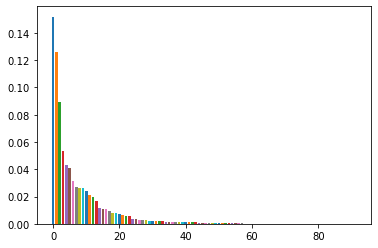

  0%|                                       | 1/12972 [00:00<2:47:07,  1.29it/s]

Information bit:  4.273904230426276
aalii


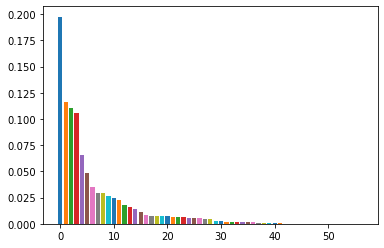

  0%|                                       | 2/12972 [00:01<2:17:41,  1.57it/s]

Information bit:  4.076042509744166
aargh


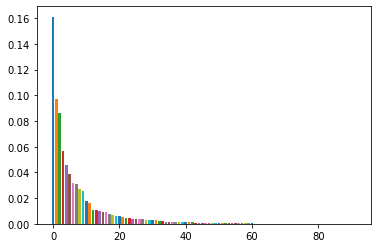

  0%|                                       | 3/12972 [00:02<2:29:15,  1.45it/s]

Information bit:  4.264849755999675
aarti


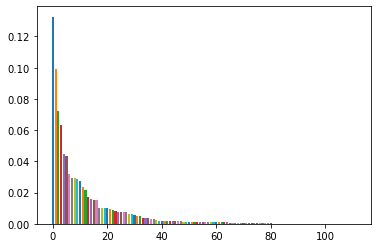

  0%|                                       | 4/12972 [00:02<2:48:02,  1.29it/s]

Information bit:  4.823845067845458
abaca


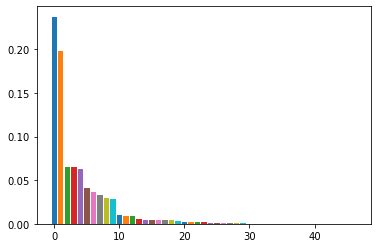

  0%|                                       | 5/12972 [00:03<2:22:39,  1.51it/s]

Information bit:  3.363389637286832
abaci


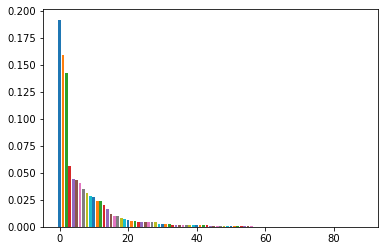

  0%|                                       | 6/12972 [00:04<2:28:55,  1.45it/s]

Information bit:  4.150734686782171
aback


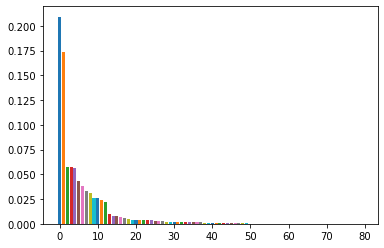

  0%|                                       | 7/12972 [00:04<2:29:16,  1.45it/s]

Information bit:  3.9265316428750388
abacs


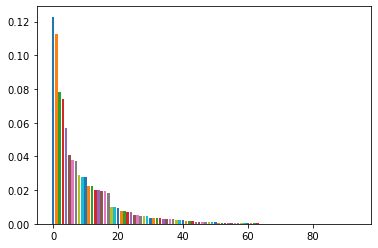

  0%|                                       | 8/12972 [00:05<2:36:17,  1.38it/s]

Information bit:  4.608618985510467
abaft


KeyboardInterrupt: 

In [64]:
from math import *
from tqdm import tqdm
E = {}
for word in tqdm(allowed_words):
    print(word)
    prob = []
    patterns = cpl(word)
    for pattern in patterns:
        sample = eliminate_1(word,pattern)
        prob.append(len(sample)/no_of_aw)
    s_p = prob
    s_p.sort(reverse=True)
    plt.figure()
    for i in range(len(s_p)):
        plt.bar(i,s_p[i])
    plt.show()
    
    #entropy
    
    e = en(prob,base=2)
    print("Information bit: ",e)
    E.update({word:e})


In [55]:
from math import *
E = {}
for word in tqdm(allowed_words):
    patterns = cpl(word)
    print(word)
    prob = []
    for pattern in patterns:
        sample = eliminate_1(word,pattern)
        prob.append(len(sample)/no_of_aw)


    #entropy
    
    e = 0
    for i in tqdm(prob):
        if(i != 0):
            e = e - i*log2(i)
        else:
            e = e - i*log2(i+1)
    #print("Information bit: ",e)
    E.update({word:e})

  0%|                                                 | 0/12972 [00:00<?, ?it/s]

aahed



  0%|                                       | 1/12972 [00:00<2:30:06,  1.44it/s]

aalii



  0%|                                       | 2/12972 [00:01<1:59:10,  1.81it/s]

aargh



  0%|                                       | 3/12972 [00:01<2:09:18,  1.67it/s]

aarti



  0%|                                       | 4/12972 [00:02<2:26:04,  1.48it/s]

abaca



  0%|                                       | 5/12972 [00:02<1:59:52,  1.80it/s]

abaci



  0%|                                       | 6/12972 [00:03<2:05:44,  1.72it/s]

aback



  0%|                                       | 7/12972 [00:04<2:05:31,  1.72it/s]

abacs



  0%|                                       | 8/12972 [00:04<2:14:12,  1.61it/s]

abaft



  0%|                                       | 9/12972 [00:05<2:10:23,  1.66it/s]

abaka



  0%|                                      | 10/12972 [00:05<1:52:16,  1.92it/s]

abamp



  0%|                                      | 11/12972 [00:06<1:54:44,  1.88it/s]

aband



  0%|                                      | 12/12972 [00:06<2:03:45,  1.75it/s]

abase



  0%|                                      | 13/12972 [00:07<2:15:45,  1.59it/s]

abash



  0%|                                      | 14/12972 [00:08<2:19:51,  1.54it/s]

abask



  0%|                                      | 15/12972 [00:09<2:23:12,  1.51it/s]

abate



  0%|                                      | 16/12972 [00:09<2:28:49,  1.45it/s]

abaya



  0%|                                      | 17/12972 [00:10<2:07:25,  1.69it/s]

abbas



  0%|                                      | 18/12972 [00:10<2:03:31,  1.75it/s]

abbed



  0%|                                      | 19/12972 [00:11<2:05:35,  1.72it/s]

abbes



  0%|                                      | 20/12972 [00:12<2:12:18,  1.63it/s]

abbey



  0%|                                      | 21/12972 [00:12<2:12:59,  1.62it/s]

abbot



  0%|                                      | 22/12972 [00:13<2:11:31,  1.64it/s]

abcee



  0%|                                      | 23/12972 [00:13<2:11:54,  1.64it/s]

abeam



  0%|                                      | 24/12972 [00:14<2:17:08,  1.57it/s]

abear



  0%|                                      | 25/12972 [00:15<2:26:32,  1.47it/s]

abele



  0%|                                      | 26/12972 [00:16<2:30:36,  1.43it/s]

abers



  0%|                                      | 27/12972 [00:17<2:56:44,  1.22it/s]

abets



  0%|                                      | 28/12972 [00:18<3:12:39,  1.12it/s]

abhor



  0%|                                      | 29/12972 [00:19<3:09:28,  1.14it/s]

abide



  0%|                                      | 30/12972 [00:20<3:14:42,  1.11it/s]

abies



  0%|                                      | 31/12972 [00:21<3:24:31,  1.05it/s]

abled



  0%|                                      | 32/12972 [00:22<3:27:16,  1.04it/s]

abler



  0%|                                      | 33/12972 [00:23<3:30:19,  1.03it/s]

ables



  0%|                                      | 34/12972 [00:24<3:38:38,  1.01s/it]

ablet



  0%|                                      | 35/12972 [00:25<3:39:02,  1.02s/it]

ablow



  0%|                                      | 36/12972 [00:25<3:21:16,  1.07it/s]

abmho



  0%|                                      | 37/12972 [00:26<3:10:40,  1.13it/s]

abode



  0%|                                      | 38/12972 [00:27<3:15:12,  1.10it/s]

abohm



  0%|                                      | 39/12972 [00:28<3:08:12,  1.15it/s]

aboil



  0%|                                      | 40/12972 [00:29<3:11:41,  1.12it/s]

aboma



  0%|                                      | 41/12972 [00:30<2:56:08,  1.22it/s]

aboon



  0%|                                      | 42/12972 [00:30<2:43:23,  1.32it/s]

abord



  0%|▏                                     | 43/12972 [00:31<2:58:19,  1.21it/s]

abore



  0%|▏                                     | 44/12972 [00:32<3:11:02,  1.13it/s]

abort



  0%|▏                                     | 45/12972 [00:33<3:17:19,  1.09it/s]

about



  0%|▏                                     | 46/12972 [00:34<3:14:01,  1.11it/s]

above



  0%|▏                                     | 47/12972 [00:35<3:08:10,  1.14it/s]

abram



  0%|▏                                     | 48/12972 [00:36<2:57:25,  1.21it/s]

abray



  0%|▏                                     | 49/12972 [00:36<2:49:26,  1.27it/s]

abrim



  0%|▏                                     | 50/12972 [00:37<2:58:24,  1.21it/s]

abrin



  0%|▏                                     | 51/12972 [00:38<3:07:06,  1.15it/s]

abris



  0%|▏                                     | 52/12972 [00:39<3:20:57,  1.07it/s]

absey



  0%|▏                                     | 53/12972 [00:40<3:25:27,  1.05it/s]

absit



  0%|▏                                     | 54/12972 [00:41<3:29:06,  1.03it/s]

abuna



  0%|▏                                     | 55/12972 [00:42<3:08:02,  1.14it/s]

abune



  0%|▏                                     | 56/12972 [00:43<3:09:36,  1.14it/s]

abuse



  0%|▏                                     | 57/12972 [00:44<3:17:14,  1.09it/s]

abuts



  0%|▏                                     | 58/12972 [00:45<3:24:37,  1.05it/s]

abuzz



  0%|▏                                     | 59/12972 [00:45<2:47:34,  1.28it/s]

abyes



  0%|▏                                     | 60/12972 [00:46<3:03:24,  1.17it/s]

abysm



  0%|▏                                     | 61/12972 [00:47<3:00:44,  1.19it/s]

abyss



  0%|▏                                     | 62/12972 [00:48<2:49:27,  1.27it/s]

acais



  0%|▏                                     | 63/12972 [00:49<2:48:57,  1.27it/s]

acari



  0%|▏                                     | 64/12972 [00:49<2:47:02,  1.29it/s]

accas



  1%|▏                                     | 65/12972 [00:50<2:30:21,  1.43it/s]

accoy



  1%|▏                                     | 66/12972 [00:50<2:26:08,  1.47it/s]

acerb



  1%|▏                                     | 67/12972 [00:51<2:42:33,  1.32it/s]

acers



  1%|▏                                     | 68/12972 [00:53<3:10:03,  1.13it/s]

aceta



  1%|▏                                     | 69/12972 [00:53<3:02:26,  1.18it/s]

achar



  1%|▏                                     | 70/12972 [00:54<2:51:15,  1.26it/s]

ached



  1%|▏                                     | 71/12972 [00:55<2:59:47,  1.20it/s]

aches



  1%|▏                                     | 72/12972 [00:56<3:12:01,  1.12it/s]

achoo



  1%|▏                                     | 73/12972 [00:57<2:51:35,  1.25it/s]

acids



  1%|▏                                     | 74/12972 [00:58<3:06:20,  1.15it/s]

acidy



  1%|▏                                     | 75/12972 [00:58<3:05:23,  1.16it/s]

acing



  1%|▏                                     | 76/12972 [00:59<3:05:41,  1.16it/s]

acini



  1%|▏                                     | 77/12972 [01:00<2:51:44,  1.25it/s]

ackee



  1%|▏                                     | 78/12972 [01:01<2:41:05,  1.33it/s]

acker



  1%|▏                                     | 79/12972 [01:01<2:52:25,  1.25it/s]

acmes



  1%|▏                                     | 80/12972 [01:03<3:09:01,  1.14it/s]

acmic



  1%|▏                                     | 81/12972 [01:03<2:49:28,  1.27it/s]

acned



  1%|▏                                     | 82/12972 [01:04<3:05:09,  1.16it/s]

acnes



  1%|▏                                     | 83/12972 [01:05<3:23:00,  1.06it/s]

acock



  1%|▏                                     | 84/12972 [01:06<3:00:18,  1.19it/s]

acold



  1%|▏                                     | 85/12972 [01:07<3:10:52,  1.13it/s]

acorn



  1%|▎                                     | 86/12972 [01:08<3:20:51,  1.07it/s]

acred



  1%|▎                                     | 87/12972 [01:09<3:33:48,  1.00it/s]

acres



  1%|▎                                     | 88/12972 [01:10<3:47:44,  1.06s/it]

acrid



  1%|▎                                     | 89/12972 [01:11<3:47:21,  1.06s/it]

acros



  1%|▎                                     | 90/12972 [01:12<3:53:18,  1.09s/it]

acted



  1%|▎                                     | 91/12972 [01:13<3:45:43,  1.05s/it]

actin



  1%|▎                                     | 92/12972 [01:14<3:46:06,  1.05s/it]

acton



  1%|▎                                     | 93/12972 [01:16<3:44:59,  1.05s/it]

actor



  1%|▎                                     | 94/12972 [01:17<3:44:21,  1.05s/it]

acute



  1%|▎                                     | 95/12972 [01:18<3:40:31,  1.03s/it]

acyls



  1%|▎                                     | 96/12972 [01:18<3:34:42,  1.00s/it]

adage



  1%|▎                                     | 97/12972 [01:19<3:12:21,  1.12it/s]

adapt



  1%|▎                                     | 98/12972 [01:20<2:56:30,  1.22it/s]

adaws



  1%|▎                                     | 99/12972 [01:20<2:48:39,  1.27it/s]

adays



  1%|▎                                    | 100/12972 [01:21<2:44:40,  1.30it/s]

adbot



  1%|▎                                    | 101/12972 [01:22<2:50:44,  1.26it/s]

addax



  1%|▎                                    | 102/12972 [01:22<2:23:30,  1.49it/s]

added



  1%|▎                                    | 103/12972 [01:23<2:05:47,  1.71it/s]

adder



  1%|▎                                    | 104/12972 [01:24<2:14:27,  1.59it/s]

addio



  1%|▎                                    | 105/12972 [01:24<2:18:08,  1.55it/s]

addle



  1%|▎                                    | 106/12972 [01:25<2:20:14,  1.53it/s]

adeem



  1%|▎                                    | 107/12972 [01:26<2:23:15,  1.50it/s]

adept



  1%|▎                                    | 108/12972 [01:27<2:41:32,  1.33it/s]

adhan



  1%|▎                                    | 109/12972 [01:27<2:34:34,  1.39it/s]

adieu



  1%|▎                                    | 110/12972 [01:28<2:45:23,  1.30it/s]

adios



  1%|▎                                    | 111/12972 [01:29<3:07:35,  1.14it/s]

adits



  1%|▎                                    | 112/12972 [01:30<3:21:51,  1.06it/s]

adman



  1%|▎                                    | 113/12972 [01:31<3:07:50,  1.14it/s]

admen



  1%|▎                                    | 114/12972 [01:32<3:17:15,  1.09it/s]

admin


  1%|▎                                    | 114/12972 [01:33<2:55:03,  1.22it/s]


KeyboardInterrupt: 

trace


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  7.60it/s]

Information bit:  0.0


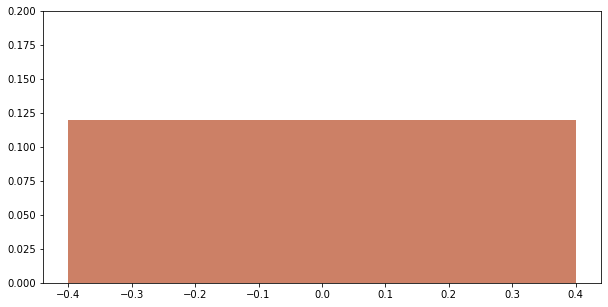

In [14]:
word = 'trace'
print(word)
prob = []
#patterns = cpl(word)
patterns = ['00000']
for pattern in tqdm(patterns):
    sample = eliminate_1(word,pattern,allowed_words)
    prob.append(len(sample)/no_of_aw)
s_p = prob
s_p.sort(reverse=True)
plt.figure(figsize=(10,5))
for i in range(len(s_p)):
    plt.bar(i,s_p[i],color=(0.8, 0.5, 0.4, 1))
x1,x2,y1,y2 = plt.axis()  
plt.axis((x1,x2,0,0.2))
e = en(prob,base=2)
print("Information bit: ",e)



In [15]:
print(prob)

[0.12010484119642306]


In [17]:
print(-log2(prob[0]))

3.0576337903941373


In [ ]:
print(len(allowed_words))

fuzzy


100%|███████████████████████████████████████████| 55/55 [00:00<00:00, 97.89it/s]


Information bit:  2.3678725750215093
1
[0.6070767807585569, 0.08171446191797718, 0.07153869873573851, 0.06552574776441566, 0.04810360777058279, 0.029679309281529447, 0.020428615479494296, 0.013336416897934012, 0.013028060437866173, 0.007015109466543324, 0.005242059821153253, 0.0043940795559666975, 0.004239901325932778, 0.0035460992907801418, 0.003160653715695344, 0.003083564600678384, 0.002466851680542707, 0.002466851680542707, 0.002389762565525748, 0.0020814061054579094, 0.0016959605303731114, 0.001541782300339192, 0.0010792476102374346, 0.0010021584952204748, 0.000770891150169596, 0.000770891150169596, 0.0006938020351526364, 0.0006167129201356768, 0.0006167129201356768, 0.0006167129201356768, 0.0005396238051187173, 0.00046253469010175765, 0.000385445575084798, 0.0003083564600678384, 0.0003083564600678384, 0.00023126734505087883, 0.00023126734505087883, 0.00023126734505087883, 0.00023126734505087883, 0.00023126734505087883, 0.0001541782300339192, 0.0001541782300339192, 0.0001541782300

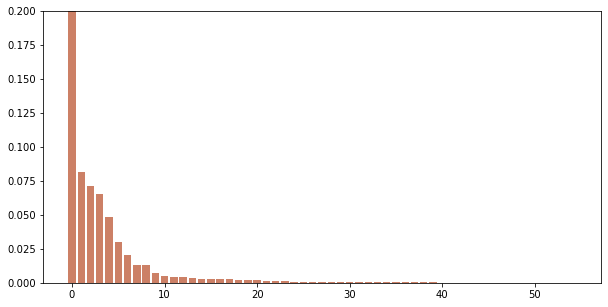

In [67]:
word = 'fuzzy'
print(word)
prob = []
patterns = cpl(word)
for pattern in tqdm(patterns):
    sample = eliminate_1(word,pattern,allowed_words)
    prob.append(len(sample)/no_of_aw)
s_p = prob
s_p.sort(reverse=True)
plt.figure(figsize=(10,5))
for i in range(len(s_p)):
    plt.bar(i,s_p[i],color=(0.8, 0.5, 0.4, 1))
x1,x2,y1,y2 = plt.axis()  
plt.axis((x1,x2,0,0.2))
e = en(prob,base=2)
print("Information bit: ",e)
print(len(sample))
print(prob)
print("information bit: ", log2(1/prob[0]))

In [74]:
a = 'wordd'
a[4] = '#'
print(a)

TypeError: 'str' object does not support item assignment